<a href="https://colab.research.google.com/github/vianziro/CarDetection/blob/main/Kirim_Deteksi_Objek_Klasifikasi_Mobil_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Car Retrieval System
### (Deteksi Objek + Klasifikasi Mobil Indonesia)
# **Oleh**: Sepyan Purnama Kristanto
# **Dataset**: [Roboflow Mobil-Memdi](https://universe.roboflow.com/mobil-dataset/mobil-memdi)  
# **Framework**: YOLOv8 (Deteksi), PyTorch (Klasifikasi)  
# **Video Demo**: [Link Video](https://intip.in/QNpw)


In [ ]:

!pip install roboflow ultralytics torch torchvision opencv-python matplotlib tqdms
import os
import cv2
import yaml
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from roboflow import Roboflow
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torch import nn, optim
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 35.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 1. Download dan load dataset Roboflow (mobil-memdi v1)
rf = Roboflow(api_key="6wi61xQp1uXU6rrpVN1w")
project = rf.workspace("mobil-dataset").project("mobil-memdi")
dataset = project.version(9).download("yolov9")

In [ ]:
import os
import cv2
import yaml

# Path dataset deteksi
dataset_path = "/kaggle/working/Mobil-9"
image_folder = os.path.join(dataset_path, "train", "images")
label_folder = os.path.join(dataset_path, "train", "labels")

# Load kelas dari data.yaml
with open(os.path.join(dataset_path, "data.yaml")) as f:
    class_names = yaml.safe_load(f)['names']

# Folder output dataset klasifikasi
output_dir = "/kaggle/working/classification_dataset"
os.makedirs(output_dir, exist_ok=True)

for img_file in os.listdir(image_folder):
    if not img_file.endswith((".jpg", ".png")):
        continue

    image_path = os.path.join(image_folder, img_file)
    label_path = os.path.join(label_folder, os.path.splitext(img_file)[0] + ".txt")

    image = cv2.imread(image_path)
    h, w = image.shape[:2]

    if not os.path.exists(label_path):
        continue

    with open(label_path, "r") as f:
        for i, line in enumerate(f.readlines()):
            class_id, x_center, y_center, bbox_w, bbox_h = map(float, line.strip().split())
            x_center, y_center, bbox_w, bbox_h = x_center*w, y_center*h, bbox_w*w, bbox_h*h
            x1, y1 = int(x_center - bbox_w / 2), int(y_center - bbox_h / 2)
            x2, y2 = int(x_center + bbox_w / 2), int(y_center + bbox_h / 2)
            crop = image[max(0,y1):min(h,y2), max(0,x1):min(w,x2)]
            if crop.size == 0:
                continue

            class_name = class_names[int(class_id)]
            save_class_dir = os.path.join(output_dir, class_name)
            os.makedirs(save_class_dir, exist_ok=True)
            save_path = os.path.join(save_class_dir, f"{os.path.splitext(img_file)[0]}_{i}.jpg")
            cv2.imwrite(save_path, crop)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 211MB/s]


Epoch 1: Loss = 238.2100
Epoch 2: Loss = 82.2581
Epoch 3: Loss = 48.5011
Epoch 4: Loss = 27.4729
Epoch 5: Loss = 23.0440
✅ Model klasifikasi disimpan.


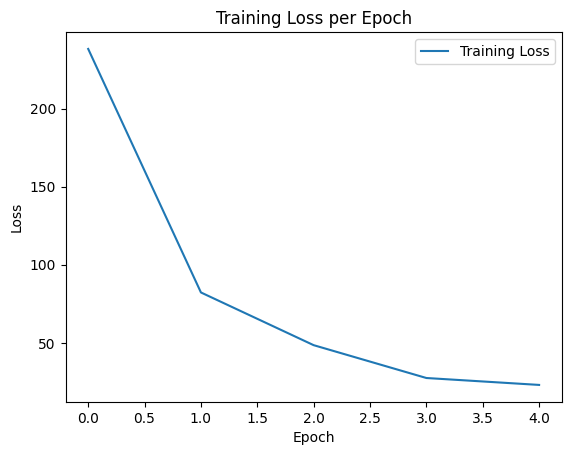

In [ ]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torch import nn, optim
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder("classification_dataset", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet50(weights="IMAGENET1K_V2")
model.fc = nn.Linear(model.fc.in_features, len(dataset.classes))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []
for epoch in range(5):
    model.train()
    running_loss = 0.0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
    print(f"Epoch {epoch+1}: Loss = {running_loss:.4f}")

# Simpan model hasil
torch.save(model.state_dict(), "mobil_classifier.pth")
print("✅ Model klasifikasi disimpan.")

# Plot loss
plt.plot(losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()
plt.show()


✅ Menggunakan device: cuda

🔎 Accuracy: 95.05%

📋 Classification Report:

                     precision    recall  f1-score   support

 Daihatsu_Grand_Max       0.96      0.98      0.97       185
     Daihatsu_Rocky       0.97      0.99      0.98       122
     Daihatsu_Sigra       0.79      0.99      0.88       123
    Daihatsu_Terios       0.90      0.98      0.94       129
     Daihatsu_Xenia       1.00      0.86      0.93       111
          Datsun_Go       1.00      0.98      0.99       274
         Honda_Brio       0.97      0.99      0.98       142
          Honda_CRV       0.82      1.00      0.90       239
         Honda_City       0.91      0.73      0.81       160
        Honda_Civic       1.00      0.90      0.95       498
          Honda_HRV       0.98      1.00      0.99       252
      Honda_Mobilio       1.00      0.98      0.99       237
Mitsubishi_Expander       0.78      0.99      0.87       150
    Mitsubishi_L300       0.99      0.99      0.99       251
         S

Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.
Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from current font.


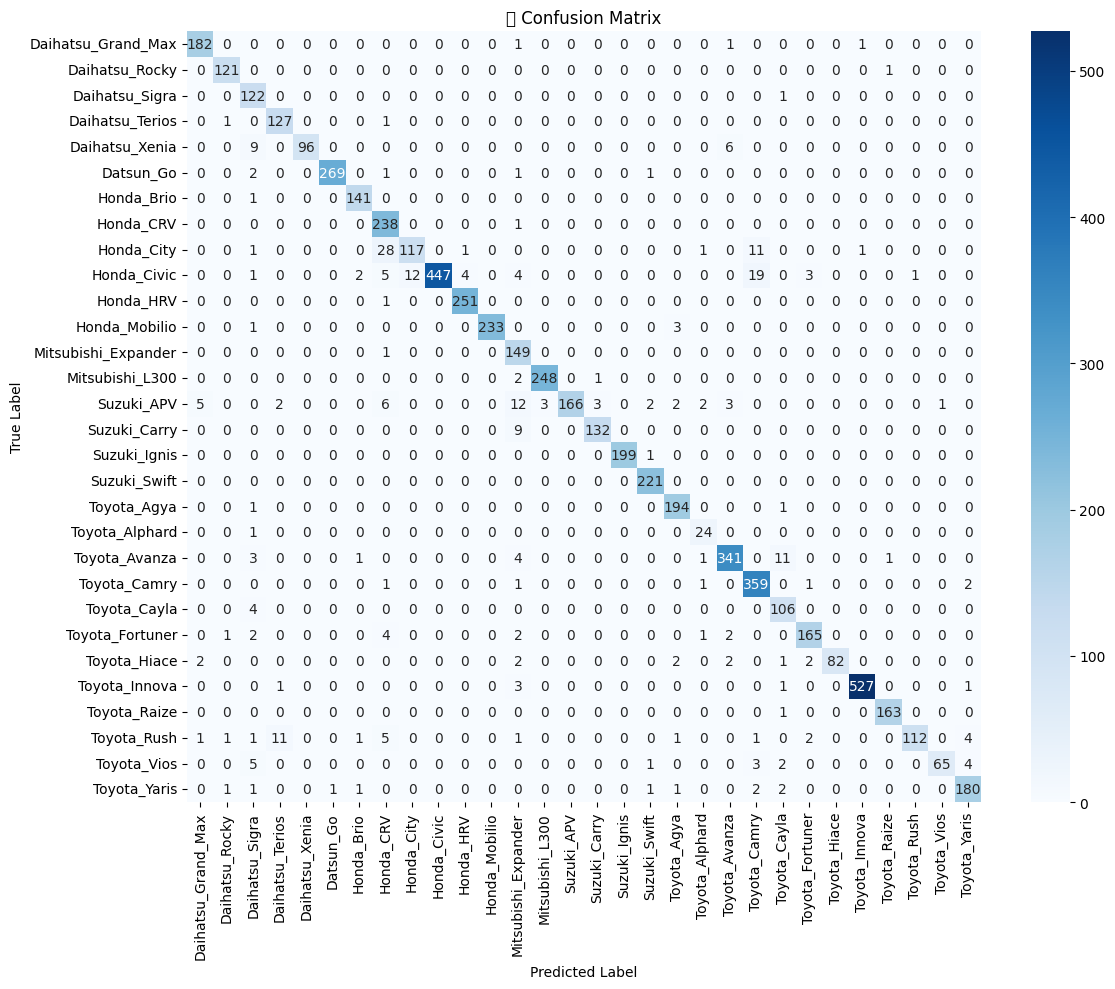

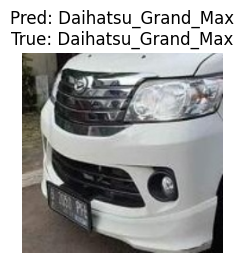

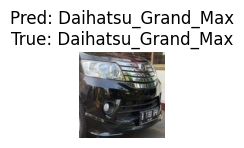

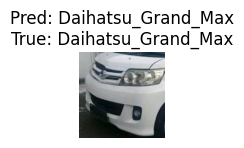

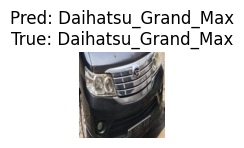

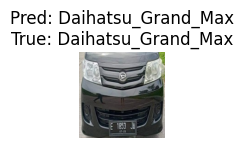

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

# Gunakan GPU pada IDE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Menggunakan device: {device}")

# Setting Path dataset validasi/test
test_dir = "/kaggle/working/classification_dataset"

# Transformasi
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Setting Dataset dan DataLoader
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Setting Label kelas
class_names = test_dataset.classes

# Load model yang akan dipakai
model = models.resnet50(weights=None)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model.load_state_dict(torch.load("mobil_classifier.pth", map_location=device))
model.to(device)
model.eval()

# Evaluasi hasil
y_true = []
y_pred = []


with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())

#===================================
#Tahap Evaluasi#
#===================================

# 1. Accuracy Process

accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"\n🔎 Accuracy: {accuracy * 100:.2f}%")

# 2. Classification Report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\n📋 Classification Report:\n")
print(report)


# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🧩 Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 4. Visualisasi beberapa prediksi

def imshow(inp, title=None):
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.axis("off")
    plt.pause(0.001)

dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
outputs = model(images)
preds = torch.argmax(outputs, 1)


plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    imshow(images[i], title=f"Pred: {class_names[preds[i]]}\nTrue: {class_names[labels[i]]}")
plt.tight_layout()
plt.show()


In [ ]:
!pip install gdown
import gdown

import gdown
file_id = "1GVFCHKC_kSMm2SbcdZu-Dg6cKNQu_zt-"
output_name = "video_uji.mp4"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, output_name, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GVFCHKC_kSMm2SbcdZu-Dg6cKNQu_zt-
To: /kaggle/working/video_uji.mp4
100%|██████████| 65.1M/65.1M [00:00<00:00, 80.5MB/s]


'video_uji.mp4'

In [ ]:
!pip install deep_sort_realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 55.4 MB/s eta 0:00:0000:0100:01


In [ ]:
import cv2
from PIL import Image
from torch import nn
from torchvision import transforms, models
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
from collections import defaultdict
from deep_sort_realtime.deepsort_tracker import DeepSort

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Menggunakan perangkat: {device}")
class_names = os.listdir("classification_dataset")
class_names.sort()

mapping_category = {
    'Daihatsu_Grand_Max': 'MPV', 'Daihatsu_Rocky': 'SUV', 'Daihatsu_Sigra': 'MPV',
    'Daihatsu_Terios': 'SUV', 'Daihatsu_Xenia': 'MPV', 'Datsun_Go': 'Hatchback',
    'Honda_Brio': 'Hatchback', 'Honda_CRV': 'SUV', 'Honda_City': 'Sedan',
    'Honda_Civic': 'Sedan', 'Honda_HRV': 'SUV', 'Honda_Mobilio': 'MPV',
    'Mitsubishi_Expander': 'MPV', 'Mitsubishi_L300': 'Pickup', 'Suzuki_APV': 'MPV',
    'Suzuki_Carry': 'Pickup', 'Suzuki_Ignis': 'Hatchback', 'Suzuki_Swift': 'Hatchback',
    'Toyota_Agya': 'Hatchback', 'Toyota_Alphard': 'MPV', 'Toyota_Avanza': 'MPV',
    'Toyota_Camry': 'Sedan', 'Toyota_Cayla': 'Hatchback', 'Toyota_Fortuner': 'SUV',
    'Toyota_Hiace': 'Van', 'Toyota_Innova': 'MPV', 'Toyota_Raize': 'SUV',
    'Toyota_Rush': 'SUV', 'Toyota_Vios': 'Sedan', 'Toyota_Yaris': 'Hatchback'
}

model = models.resnet50(weights=None)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model.load_state_dict(torch.load("mobil_classifier.pth", map_location=device))
model = model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load YOLOv8 dan DeepSORT
detector = YOLO("yolov8n.pt")
tracker = DeepSort(max_age=30)

# Video Input dan Output
cap = cv2.VideoCapture("/kaggle/working/video_uji.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter("output_tracked.mp4", fourcc, fps, (w, h))

#  Logging dan Counter
detected_ids = set()
counts = defaultdict(set)
log_data = []
frame_idx = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_idx += 1
    results = detector(frame)[0]

    detections = []
    for box in results.boxes:
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        label = detector.names[cls]
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        if label not in ['car', 'motorcycle', 'person', 'truck', 'bus', 'bicycle']:
            continue

        detections.append(([x1, y1, x2 - x1, y2 - y1], conf, label))

    tracks = tracker.update_tracks(detections, frame=frame)

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        l, t, w_, h_ = track.to_ltrb()
        x1, y1, x2, y2 = int(l), int(t), int(w_), int(h_)

        label = track.det_class if hasattr(track, 'det_class') else 'unknown'
        crop = frame[y1:y2, x1:x2]

        class_name, category = '-', '-'

        if label == 'car' and crop.size != 0:
            crop_pil = Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            img_tensor = transform(crop_pil).unsqueeze(0).to(device)
            with torch.no_grad():
                output = model(img_tensor)
                pred = torch.argmax(output, dim=1).item()
                class_name = class_names[pred]
                category = mapping_category.get(class_name, 'Uncertain')

        if label == 'car' and category != '-':
            counts[category].add(track_id)

        label_text = f"{label.upper()}"
        if category != '-' and class_name != '-':
            label_text = f"{category} - {class_name}"

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 0, 255), 2)

        log_data.append({
            'frame': frame_idx,
            'track_id': track_id,
            'label': label,
            'class_name': class_name,
            'category': category,
            'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2
        })

    y = 30
    for cat, ids in counts.items():
        cv2.putText(frame, f"{cat}: {len(ids)}", (10, y), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (255, 255, 255), 2)
        y += 25

    out.write(frame)

cap.release()
out.release()

# === Simpan Log ke CSV ===
pd.DataFrame(log_data).to_csv("detection_log.csv", index=False)
print("✅ Video dan log berhasil disimpan.")


✅ Menggunakan perangkat: cuda

0: 384x640 2 persons, 5 cars, 3 motorcycles, 1 truck, 7.7ms
Speed: 1.7ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 4 cars, 3 motorcycles, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 4 cars, 3 motorcycles, 1 truck, 6.7ms
Speed: 1.7ms preprocess, 6.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 5 cars, 2 motorcycles, 1 truck, 6.8ms
Speed: 1.7ms preprocess, 6.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 5 cars, 3 motorcycles, 1 truck, 6.5ms
Speed: 1.7ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 6 cars, 2 motorcycles, 1 truck, 6.9ms
Speed: 1.8ms preprocess, 6.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 5 cars, 3 motorcy